### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


### (1)What is the independent variable? What is the dependent variable?

**Independent variable** is which shows congurency. If the tests are congruent or incongruent.<br>
**Dependant variable** is response time in seconds.

### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Null Hypothesis** H0 ( μI - μC = 0 ) - Average response time of sample population has no significance difference in viewing congruent words and incongruent words.<br>
**Alternate Hypothesis** H1 ( μI - μC ≠ 0 ) - Average response time of sample population does gets influenced by congruency in positive or negative way.<br>


   **H0 μI ≤ μC (μI - Population mean of incongruent values, μC - Population mean of congruent values)**<br>

   **H1 μI > μC (μI - Population mean of incongruent values, μC - Population mean of congruent values)**<br>
   
 - Our hypothesis should be concerned with μC and μI respectively the congruent and incongruent population   means.<br>
 

 - We will perform Dependent Samples t-Test (two tailed) as t-Test is more appropriate dealing with 2 different conditions with same subject to assess whether the sample means are different or just by chance.<br>
 

 - The idea of hypothesis testing and statistical inference is that we have limited data, samples(generally denoted by X), and from that limited data, we are trying to infer something about the population (generally denoted by U) we don't know about.



### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [68]:
# Let's check the dataset
import math
from scipy.stats import t
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
stroop_data = pd.read_csv('stroopdata.csv')
stroop_data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [69]:
print(stroop_data.mean(axis=0))
print(stroop_data.std(axis=0))
print("standard deviation for congruent {0:.3f}".format(np.std(stroop_data['Congruent'].values)))
print("standard deviation for Incongruent {0:.3f}".format(np.std(stroop_data['Incongruent'].values)))

Congruent      14.051125
Incongruent    22.015917
dtype: float64
Congruent      3.559358
Incongruent    4.797057
dtype: float64
standard deviation for congruent 3.484
standard deviation for Incongruent 4.696


### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

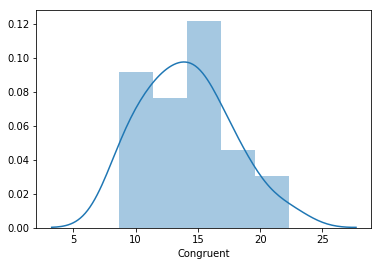

In [70]:
# Build the visualizations here
sns.distplot(stroop_data['Congruent'])

From above visualization, it seems that data is not far from normal distribution and the mean is a bit lesser than 15 

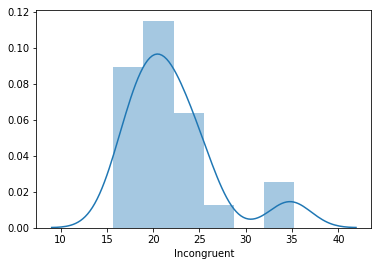

In [71]:
sns.distplot(stroop_data['Incongruent'])

From the above hist plots, it is clear that in both plots data is positively skewed and close to that of normal distribution

### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

As we see in first step above that there are n = 24 rows in this dataset. Hence for :<br>
Confidence Level = 95%<br>
degrees of freedom df = n - 1 = 23

In [72]:
# for a 95% confidence level and 23 d.f , T critical value comes up as per below
t.ppf(.95, 23)

1.7138715277470473

**T-critical value (2-sided test) = 1.7139**

Now, as we have above derived means for Congruent and Incongruent values :<br>
<font color=blue>Congruent  =    14.051125<br>
Incongruent  =  22.015917</font><br>
Let's check the point estimate(PE)of difference of the means(in seconds) to use in t statistics 
**PE** = 22.02 - 14.05 = **7.97**

Let's calculate sample standard deviation of differences

In [73]:
#s - sample standard deviation of differences
#1. Difference = sample difference
stroop_data['Difference'] = stroop_data['Incongruent'] - stroop_data['Congruent']

#2. DM = difference from the mean
#SD = squared differences from the mean
DM = stroop_data['Difference'] - stroop_data['Difference'].mean()
stroop_data['SD'] = DM*DM

#3. SSD = sum of squared differences
SSD = stroop_data['SD'].sum()

#4. Variance = SSD/(n-1)
n = 24
Variance = SSD/(n-1)
from math import *
#5. sqr = sqrt(Variance)
st = sqrt(Variance)
round(st,4)

4.8648

Now we will calculate **t-statistic** as per below:

In [74]:
#t-statistic
PE = 7.97
#t = PE/(st/√n)
#PE = (μi - μc)
t = PE/(st/(sqrt(n)))
round(t,5)

8.02595

**t-statistic value is 8.02595**

The t-statistic value is greater than t-critical value<br>
<font color=red>t-statistic > t-critical<br>
8.02595 > 1.7139</font><br>
Therefore, **null hypothesis is rejected**. This means that it take more time to complete incongruent task as compared to congruent one which is according to our expectation.